<a href="https://colab.research.google.com/github/AndreaBravo52/AlgoritmosClasificacion/blob/main/PBL4_Equipo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de sobrevivientes del Titanic**

Equipo 2:
- Andrea Bravo Avila
- Alberto Lozano Cárdenas
- Paola Guadalupe Machorro Ortiz
- Mariano Luna Tress
- Francia García Romero

In [ ]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# **Exploración de los Datos**

In [ ]:
# Dimensión del dataset. Indica cantidad de registros y columnas
print(f"El set de entrenamiento tiene {train_df.shape[0]} filas y {train_df.shape[1]} columnas")
print(f"El set de pruebas tiene {test_df.shape[0]} filas y {test_df.shape[1]} columnas")

# Columnas
print("Columns: ", list(train_df.columns))

El set de entrenamiento tiene 891 filas y 12 columnas
El set de pruebas tiene 418 filas y 11 columnas
Columns:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Porcentajes de valores faltantes
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


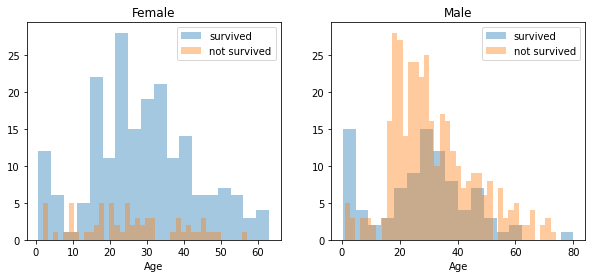

In [ ]:
# Comparación de las distribuciones de edad y sexo
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Podemos observar que hubo una mayor cantidad de supervivientes femeninos a masculinos. Para mujeres, hubo mayor cantidad de sobrevivientes entre las edades de 15 y 40, aproximadamente. Para hombres, hubo mayor cantidad de sobrevivientes de entre 18 y 50 años. No obstante, hubo más decesos para hombres de entre 18 y 30 años. En decesos de mujeres, no se observa una tendencia significativa.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


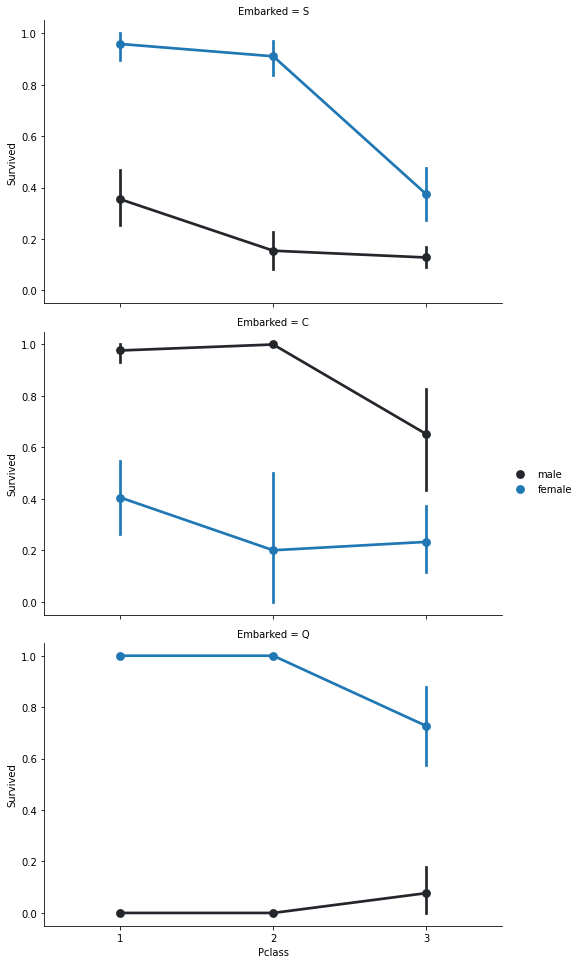

In [ ]:
# Distribuciones de embarked, pclass y sex
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

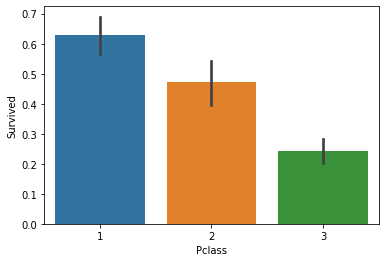

In [ ]:
# Distribución pclass
sns.barplot(x='Pclass', y='Survived', data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


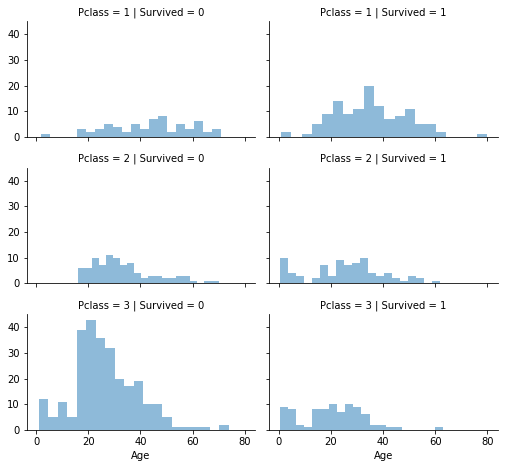

In [ ]:
# Sobrevivientes por clase
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


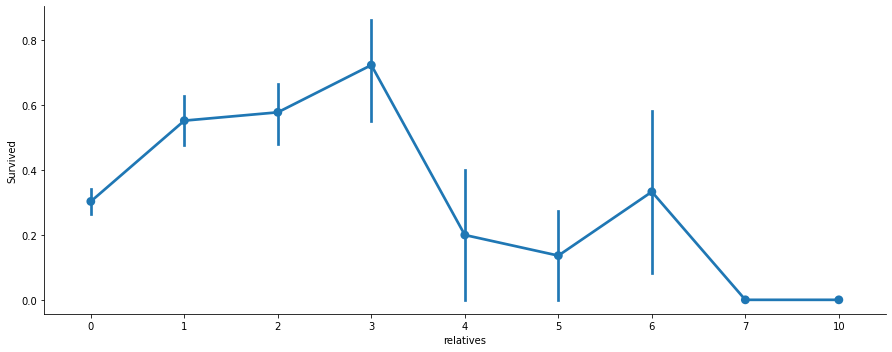

In [ ]:
# SibSp y Parch: Estas variables nos indican si un pasajero venia a bordo con hermanos/pareja, o con hijos/padres
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

axes = sns.factorplot('relatives','Survived',
                      data=train_df, aspect = 2.5, )

# **Preprocesamiento de Datos**

In [ ]:
numeric = ["Age", "SibSp", "Fare"]
categorical = ["Pclass", "Sex", "Parch", "Cabin", "Embarked"]
id_variables = ["PassengerId", "Ticket"]

# Ya que las variables de identificación no aportan información al análisis, se eliminarán del dataset
train_df = train_df.drop(id_variables, axis = 1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,1


In [ ]:
# Valores Faltantes de Cabin
# ------------------------------------------------------------------------------

# La primera letra hace referencia al nivel de habitación respecto a la cubierta
# Se sustituiran los valores completos (e.g. C123), por unicamente el nivel de la habitación (e.g. C) para reducir categorias
import re

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

# Se elimina Cabin
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [ ]:
# Valores Faltantes de Edad
# ------------------------------------------------------------------------------

# Se llenan mediante un arreglo aleatorio de números creados a patir de una distribución normal
# con parametros obtenidos de los datos existentes

data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # Calcular números aleatorios entre la media, estándar e is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    # Llene los valores de NaN en la columna Edad con valores aleatorios generados
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()


# Embarked
# ------------------------------------------------------------------------------

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)


# Fare
# ------------------------------------------------------------------------------
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)


# Nombres
# ------------------------------------------------------------------------------

# Se tomarán unicamente los títulos
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # Extraer títulos
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    # Reemplazar títulos con un título más común
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    # Convertir títulos en números
    dataset['Title'] = dataset['Title'].map(titles)

    # Llenar NaN con 0
    dataset['Title'] = dataset['Title'].fillna(0)

# Se elimina Name
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [ ]:
# Sex
# ------------------------------------------------------------------------------

# Categorias a números

genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


# Embarked
# ------------------------------------------------------------------------------

# Categorias a números

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
## Creando categorías:

# Age
# ------------------------------------------------------------------------------
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# Visualización de como se distribuye
print(train_df['Age'].value_counts())


# Fare
# ------------------------------------------------------------------------------
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)



4    165
6    160
5    146
3    134
2    120
1     98
0     68
Name: Age, dtype: int64


In [ ]:
## Creación de nuevas funciones

# Age - clase
# ------------------------------------------------------------------------------
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

# Fare por persona
# ------------------------------------------------------------------------------
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

# Visualización del conjunto de entrenamiento
  # Antes de comenzar a entrenar los modelos
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,8,5,6,1
887,1,1,1,2,0,0,2,0,0,1,2,2,2,2
888,0,3,1,5,1,2,2,0,3,0,8,2,15,0
889,1,1,0,3,0,0,2,1,0,1,3,1,3,2


# **Modelos de Aprendizaje**

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_test= X_test.drop('Ticket', axis=1)

In [ ]:
# Descenso de gradiente estocástico (SGD)
# ------------------------------------------------------------------------------
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [ ]:
# Random Forest
# ------------------------------------------------------------------------------
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction_rf = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [ ]:
# Regresión logística
# ------------------------------------------------------------------------------
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [ ]:
# K Nearest Neighbor
# ------------------------------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [ ]:
# Bayesiano Ingenuo Gaussiano
# ------------------------------------------------------------------------------
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [ ]:
# Perceptron
# ------------------------------------------------------------------------------
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# Linear Support Vector Machine
# ------------------------------------------------------------------------------
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Árbol de decisión
# ------------------------------------------------------------------------------
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [ ]:
# Comparación
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.04,Random Forest
93.04,Decision Tree
85.75,KNN
81.82,Stochastic Gradient Decent
81.71,Logistic Regression
81.59,Support Vector Machines
78.23,Naive Bayes
73.06,Perceptron


In [ ]:
# Validación
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.85393258 0.76404494 0.85393258 0.88764045 0.82022472
 0.78651685 0.78651685 0.87640449 0.87640449]
Mean: 0.8272284644194757
Standard Deviation: 0.04575609614174809


Seleccionamos **Random forest** por tener el score más alto.

## Primera prueba

Las predicciones originales fueron con el siguiente código, que usa los parámetros default de Random Forest.

In [ ]:
# Random Forest
# Andrea Bravo
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction_rf = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [ ]:
# Accuracy
acc_random_forest

print("oob score:", acc_random_forest, "%")

oob score: 93.04 %


Código para imprimir las predicciones en un csv con el formato requerido por kaggle

In [ ]:
pred=pd.DataFrame(Y_prediction_rf,test_df['PassengerId'])
pred= pred.rename(columns={0: 'Survived'})
pred.to_csv('eq2_att1.csv')
pred

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


Buscamos los mejores parámetros para mejorar el score

In [ ]:
# Perfeccionamieto de parámetros
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

In [ ]:
# clf.fit(X_train, Y_train)

In [ ]:
# clf.fit(X_train, Y_train)
# clf.bestparams

## Segunda prueba

Se vuelve a entrenar el modelo con los nuevos parámetros

In [ ]:
# Nuevos parámetros
# Random Forest
# Alberto Lozano Cárdenas
random_forest = RandomForestClassifier(criterion = "gini",
                                       min_samples_leaf = 1,
                                       min_samples_split = 5,
                                       n_estimators=100,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=1,
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.16 %


Código para imprimir las predicciones en un csv con el formato requerido por kaggle:

In [ ]:
pred2 =pd.DataFrame(Y_prediction_rf,test_df['PassengerId'])
pred2 = pred2.rename(columns={0: 'Survived'})
pred2.to_csv('eq2_att2.csv')
pred2

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


## Tercera prueba

In [ ]:
# Nuevos parámetros
# Random Forest
# Paola Guadalupe Machorro Ortiz
random_forest = RandomForestClassifier(criterion = "entropy",
                                       min_samples_leaf = 5,
                                       min_samples_split = 10,
                                       n_estimators = 100,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=1,
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.94 %


Código para imprimir las predicciones en un csv con el formato requerido por kaggle:

In [ ]:
pred=pd.DataFrame(Y_prediction_rf,test_df['PassengerId'])
pred= pred.rename(columns={0: 'Survived'})
pred.to_csv('eq2_att3.csv')
pred

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


## Cuarta prueba

In [ ]:
# Nuevos parámetros
# Random Forest
# Mariano Luna
random_forest = RandomForestClassifier(criterion = "entropy",
                                       min_samples_leaf = 5,
                                       min_samples_split = 18,
                                       n_estimators = 700,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=1,
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.28 %


Código para imprimir las predicciones en un csv con el formato requerido por kaggle:

In [ ]:
pred=pd.DataFrame(Y_prediction_rf,test_df['PassengerId'])
pred= pred.rename(columns={0: 'Survived'})
pred.to_csv('eq2_att4.csv')
pred

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


## Quinta prueba

In [ ]:
# Nuevos parámetros
# Random Forest
# Francia Garcia
random_forest = RandomForestClassifier(criterion = "gini",
                                       min_samples_leaf = 5,
                                       min_samples_split = 12,
                                       n_estimators = 100,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=1,
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.61 %


Código para imprimir las predicciones en un csv con el formato requerido por kaggle:

In [ ]:
pred=pd.DataFrame(Y_prediction_rf,test_df['PassengerId'])
pred= pred.rename(columns={0: 'Survived'})
pred.to_csv('eq2_att5.csv')
pred

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0
